In [1]:
txt = sc.textFile('wasb:///example/data/gutenberg/ulysses.txt')
txt.first()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1481543399241_0005,pyspark,idle,Link,Link,✔


SparkContext available as 'sc'.
HiveContext available as 'sqlContext'.
u'The Project Gutenberg EBook of Ulysses, by James Joyce'

In [2]:
txt.count()

33055

In [1]:
sc

In [2]:
from pyspark.sql import HiveContext
from pyspark.sql.types import *
from pyspark.sql import Row

In [3]:
csv_data = sc.textFile("file:///home/ubuntu/gtest/dist-keras/examples/data/atlas_higgs.csv")

In [4]:
type(csv_data)

pyspark.rdd.RDD

In [5]:
csv_data  = csv_data.map(lambda p: p.split(","))

In [6]:
header = csv_data.first()

In [7]:
csv_data = csv_data.filter(lambda p:p != header)

In [8]:
df_csv = csv_data.map(lambda p: Row(EmployeeID = int(p[0]), FirstName = p[1], Title=p[2], State=p[3], Laptop=p[4])).toDF()

In [9]:
type(df_csv)

pyspark.sql.dataframe.DataFrame

In [10]:
df_csv.show(5)

+----------+---------+------+-------+-------+
|EmployeeID|FirstName|Laptop|  State|  Title|
+----------+---------+------+-------+-------+
|    100000|   138.47| 27.98| 97.827| 51.655|
|    100001|  160.937|48.146|103.235| 68.768|
|    100002|   -999.0|35.635|125.953|162.172|
|    100003|  143.905| 0.414| 80.943| 81.417|
|    100004|  175.864|16.405|134.805| 16.915|
+----------+---------+------+-------+-------+
only showing top 5 rows



In [11]:
df_csv.printSchema()

root
 |-- EmployeeID: long (nullable = true)
 |-- FirstName: string (nullable = true)
 |-- Laptop: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Title: string (nullable = true)



In [12]:
from pyspark.sql import HiveContext

In [13]:
hc = HiveContext(sc)

In [14]:
%pdb

Automatic pdb calling has been turned ON


In [15]:
type(df_csv)

pyspark.sql.dataframe.DataFrame

In [16]:
df_csv.write.format('orc').options(path="hdfs://master:9000/user/hive/warehouse1").saveAsTable('df3')

In [17]:
sc.getConf()

In [18]:
conf = sc.getConf()

In [19]:
conf.getAll()

[(u'spark.executor.instances', u'7'),
 (u'spark.driver.appUIAddress', u'http://172.31.7.225:4040'),
 (u'spark.org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter.param.PROXY_HOSTS',
  u'master'),
 (u'spark.ui.proxyBase', u'/proxy/application_1497490295262_0008'),
 (u'spark.executor.id', u'driver'),
 (u'spark.driver.port', u'40169'),
 (u'spark.executor.cores', u'2'),
 (u'spark.org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter.param.PROXY_URI_BASES',
  u'http://master:8088/proxy/application_1497490295262_0008'),
 (u'spark.app.name', u'PySparkShell'),
 (u'spark.app.id', u'application_1497490295262_0008'),
 (u'spark.master', u'yarn'),
 (u'spark.sql.warehouse.dir', u'hdfs://master:9000/user/hive/warehouse'),
 (u'spark.sql.catalogImplementation', u'hive'),
 (u'spark.rdd.compress', u'True'),
 (u'spark.driver.host', u'172.31.7.225'),
 (u'spark.executorEnv.PYTHONPATH',
  u'/home/ubuntu/Download/spark-2.1.1/python/lib/py4j-0.10.4-src.zip:/home/ubuntu/Download/spark-2.1.1/python/:

In [20]:
conf.set(u'hive.metastore.warehouse.dir',u'hdfs://user/hive/warehouse')

In [21]:
import sys

In [22]:
sys.argv

['/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py',
 '-f',
 '/run/user/1000/jupyter/kernel-d74ca269-e32f-435f-9be3-f90a49fb63bb.json']

In [23]:
import os

In [24]:
os.getenv('HADOOP_HOME')

'/home/ubuntu/Download/hadoop-2.8.0'

In [25]:
sc

In [26]:
from pyspark.sql import SQLContext

In [27]:
sqlContext = SQLContext(sc)

In [29]:
sqlContext.sql("SELECT * FROM df3").show()

+----------+---------+-------+-------+-------+
|EmployeeID|FirstName| Laptop|  State|  Title|
+----------+---------+-------+-------+-------+
|    100000|   138.47|  27.98| 97.827| 51.655|
|    100001|  160.937| 48.146|103.235| 68.768|
|    100002|   -999.0| 35.635|125.953|162.172|
|    100003|  143.905|  0.414| 80.943| 81.417|
|    100004|  175.864| 16.405|134.805| 16.915|
|    100005|   89.744|116.344| 59.149|  13.55|
|    100006|  148.754| 106.13|107.782| 28.862|
|    100007|  154.916| 29.169| 94.714| 10.418|
|    100008|  105.594|  4.288|100.989| 50.559|
|    100009|  128.053|193.392| 69.272| 88.941|
|    100010|   -999.0| 27.201| 79.692|  86.24|
|    100011|  114.744| 30.816| 75.712| 10.286|
|    100012|  145.297|106.999|103.565| 64.234|
|    100013|   82.488|  8.232| 64.128| 31.663|
|    100014|   -999.0| 17.323| 14.398|109.412|
|    100015|  111.026| 23.067| 75.271| 32.096|
|    100016|  114.256| 47.221| 67.963|  4.351|
|    100017|  127.861| 26.967| 77.267| 50.953|
|    100018| 

In [30]:
sqlContext.sql("SELECT * FROM df3 WHERE State>100").show()

+----------+---------+-------+-------+-------+
|EmployeeID|FirstName| Laptop|  State|  Title|
+----------+---------+-------+-------+-------+
|    100001|  160.937| 48.146|103.235| 68.768|
|    100002|   -999.0| 35.635|125.953|162.172|
|    100004|  175.864| 16.405|134.805| 16.915|
|    100006|  148.754| 106.13|107.782| 28.862|
|    100008|  105.594|  4.288|100.989| 50.559|
|    100012|  145.297|106.999|103.565| 64.234|
|    100019|   -999.0| 15.337|115.058| 88.767|
|    100023|  141.481|174.075|111.581|  0.736|
|    100034|  156.894| 71.682|122.894| 39.256|
|    100036|  134.153|  9.377| 100.96| 23.856|
|    100037|  155.487|  2.768|125.013| 61.072|
|    100046|  201.473|  60.49|104.041| 23.002|
|    100048|  167.534|  9.909|123.308| 41.277|
|    100050|  219.057|  5.506|124.835| 72.461|
|    100052|   -999.0| 40.286|136.152| 83.924|
|    100054|  219.292|  2.423|177.143|   74.6|
|    100076|  239.551|  6.549|193.111|118.683|
|    100078|   132.35| 124.84| 106.57| 65.858|
|    100086| 

In [31]:
sqlContext.sql("SHOW TABLES").show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
| default|      df3|      false|
+--------+---------+-----------+



In [32]:
sqlContext.sql("SHOW DATABASES").show()

+------------+
|databaseName|
+------------+
|     default|
+------------+



In [33]:
sqlContext.sql("SHOW FUNCTIONS").show()

+--------------------+
|            function|
+--------------------+
|                   !|
|                   %|
|                   &|
|                   *|
|                   +|
|                   -|
|                   /|
|                   <|
|                  <=|
|                 <=>|
|                   =|
|                  ==|
|                   >|
|                  >=|
|                   ^|
|                 abs|
|                acos|
|          add_months|
|                 and|
|approx_count_dist...|
+--------------------+
only showing top 20 rows



In [35]:
%pdb

Automatic pdb calling has been turned OFF


In [36]:
sqlContext.sql("CREATE TABLE df2 (foo INT, bar STRING)")

DataFrame[]

In [37]:
sqlContext.sql("SHOW TABLES").show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
| default|      df2|      false|
| default|      df3|      false|
+--------+---------+-----------+



In [38]:
sqlContext.sql("SHOW TABLES '*2'").show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
| default|      df2|      false|
+--------+---------+-----------+



In [39]:
sqlContext.sql("CREATE EXTERNAL TABLE page_view (viewTime INT, userid BIGINT, page_url STRING, referrer_url STRING,\
              ip STRING COMMENT 'country of origination') COMMENT 'This is the staging page view table' ROW FORMAT DELIMITED \
              FIELDS TERMINATED BY '\054' STORED AS TEXTFILE LOCATION 'hdfs://master:9000/user/hive/countries'")

DataFrame[]

In [40]:
sqlContext.sql("SHOW COLUMNS FROM page_view").show()

+------------+
|    col_name|
+------------+
|    viewTime|
|      userid|
|    page_url|
|referrer_url|
|          ip|
+------------+



In [41]:
sqlContext.sql("DESCRIBE page_view").show()

+------------+---------+--------------------+
|    col_name|data_type|             comment|
+------------+---------+--------------------+
|    viewTime|      int|                null|
|      userid|   bigint|                null|
|    page_url|   string|                null|
|referrer_url|   string|                null|
|          ip|   string|country of origin...|
+------------+---------+--------------------+



In [43]:
sqlContext.sql("SHOW DATABASES").show()
sqlContext.sql("SHOW TABLES").show()

+------------+
|databaseName|
+------------+
|     default|
+------------+

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
| default|      df2|      false|
| default|      df3|      false|
| default|page_view|      false|
+--------+---------+-----------+



In [44]:
sqlContext.sql("ALTER DATABASE default SET DBPROPERTIES (key1=12)")

DataFrame[]

In [45]:
sqlContext.sql("DESCRIBE DATABASE default").show()

+-------------------------+--------------------------+
|database_description_item|database_description_value|
+-------------------------+--------------------------+
|            Database Name|                   default|
|              Description|      Default Hive data...|
|                 Location|      hdfs://master:900...|
+-------------------------+--------------------------+



In [46]:
type(sqlContext.sql("DESCRIBE DATABASE default"))

pyspark.sql.dataframe.DataFrame

In [47]:
df = sqlContext.sql("DESCRIBE DATABASE default")

In [48]:
dir(df)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_jcols',
 '_jdf',
 '_jmap',
 '_jseq',
 '_lazy_rdd',
 '_sc',
 '_schema',
 '_sort_cols',
 'agg',
 'alias',
 'approxQuantile',
 'cache',
 'checkpoint',
 'coalesce',
 'collect',
 'columns',
 'corr',
 'count',
 'cov',
 'createGlobalTempView',
 'createOrReplaceTempView',
 'createTempView',
 'crossJoin',
 'crosstab',
 'cube',
 'describe',
 'distinct',
 'drop',
 'dropDuplicates',
 'drop_duplicates',
 'dropna',
 'dtypes',
 'explain',
 'fillna',
 'filter',
 'first',
 'foreach',
 'foreachPartition',
 'freqItems',
 'groupBy',
 'groupby',
 'head',
 'intersect',
 'isLocal',
 'isStreaming',
 'is_cached',
 'join',
 'limit',
 'na',
 'orderBy',
 'persist',
 'printSchema',
 'randomSplit',
 'rdd',
 'registe

In [103]:
df.take(10)

[Row(database_description_item=u'Database Name', database_description_value=u'default'),
 Row(database_description_item=u'Description', database_description_value=u'Default Hive database'),
 Row(database_description_item=u'Location', database_description_value=u'file:/home/ubuntu/gtest/pySpark-Hive-sql/spark-warehouse')]

In [105]:
sqlContext.sql("SHOW TABLES").show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
| default|       df|      false|
| default|      df1|      false|
| default|      df2|      false|
| default|page_view|      false|
+--------+---------+-----------+



In [107]:
sqlContext.sql("SHOW TABLES").show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
| default|       df|      false|
| default|      df1|      false|
| default|      df2|      false|
| default|page_view|      false|
+--------+---------+-----------+



In [49]:
a = [1, 2, 3]

In [50]:
b = `a`
b

'[1, 2, 3]'

In [51]:
eval(b)

[1, 2, 3]

In [53]:
sqlContext.sql("DROP TABLE page_view")

DataFrame[]

In [54]:
sqlContext.sql("CREATE EXTERNAL TABLE page_view (viewTime INT, userid BIGINT, page_url STRING, referrer_url STRING,\
              ip STRING COMMENT 'country of origination') COMMENT 'This is the staging page view table' ROW FORMAT DELIMITED \
              FIELDS TERMINATED BY '\054' STORED AS TEXTFILE LOCATION 'hdfs://master:9000/user/hive/countries'")

DataFrame[]

In [120]:
sqlContext.sql("DROP TABLE images")

DataFrame[]

In [121]:
sqlContext.sql("CREATE EXTERNAL TABLE images (id STRING COMMENT 'id of images', mat STRING COMMENT 'string of list') COMMENT \
'This is used to store images' ROW FORMAT DELIMITED \
FIELDS TERMINATED BY '\t' STORED AS TEXTFILE LOCATION 'hdfs://master:9000/user/hive/images'")

DataFrame[]

In [112]:
sqlContext.sql("SHOW TABLES").show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
| default|      df2|      false|
| default|      df3|      false|
| default|   images|      false|
| default| my_table|      false|
| default|page_view|      false|
+--------+---------+-----------+



In [58]:
b

'[1, 2, 3]'

In [122]:
data = sqlContext.createDataFrame([('1', '[1, 2, 3]'), ('2', '[4, 5, 6]'), ('3', '[7, 8, 9]')], ['id', 'mat'])

In [123]:
data.show()

+---+---------+
| id|      mat|
+---+---------+
|  1|[1, 2, 3]|
|  2|[4, 5, 6]|
|  3|[7, 8, 9]|
+---+---------+



In [124]:
data.toDF('id', 'mat')

DataFrame[id: string, mat: string]

In [125]:
data.show()

+---+---------+
| id|      mat|
+---+---------+
|  1|[1, 2, 3]|
|  2|[4, 5, 6]|
|  3|[7, 8, 9]|
+---+---------+



In [126]:
data.write.mode("append").insertInto('images')

In [127]:
sqlContext.sql("SELECT * FROM images").show()

+---+---------+
| id|      mat|
+---+---------+
|  1|[1, 2, 3]|
|  2|[4, 5, 6]|
|  3|[7, 8, 9]|
+---+---------+



In [65]:
sqlContext.sql("SELECT * FROM df3").show()

+----------+---------+-------+-------+-------+
|EmployeeID|FirstName| Laptop|  State|  Title|
+----------+---------+-------+-------+-------+
|    100000|   138.47|  27.98| 97.827| 51.655|
|    100001|  160.937| 48.146|103.235| 68.768|
|    100002|   -999.0| 35.635|125.953|162.172|
|    100003|  143.905|  0.414| 80.943| 81.417|
|    100004|  175.864| 16.405|134.805| 16.915|
|    100005|   89.744|116.344| 59.149|  13.55|
|    100006|  148.754| 106.13|107.782| 28.862|
|    100007|  154.916| 29.169| 94.714| 10.418|
|    100008|  105.594|  4.288|100.989| 50.559|
|    100009|  128.053|193.392| 69.272| 88.941|
|    100010|   -999.0| 27.201| 79.692|  86.24|
|    100011|  114.744| 30.816| 75.712| 10.286|
|    100012|  145.297|106.999|103.565| 64.234|
|    100013|   82.488|  8.232| 64.128| 31.663|
|    100014|   -999.0| 17.323| 14.398|109.412|
|    100015|  111.026| 23.067| 75.271| 32.096|
|    100016|  114.256| 47.221| 67.963|  4.351|
|    100017|  127.861| 26.967| 77.267| 50.953|
|    100018| 

In [67]:
sqlContext.sql("DESCRIBE TABLE df3").show()

+----------+---------+-------+
|  col_name|data_type|comment|
+----------+---------+-------+
|EmployeeID|   bigint|   null|
| FirstName|   string|   null|
|    Laptop|   string|   null|
|     State|   string|   null|
|     Title|   string|   null|
+----------+---------+-------+



In [68]:
sqlContext.sql("CREATE TABLE my_table (EmployeeID BIGINT, FirstName STRING, Laptop STRING, State STRING, Title STRING)")

DataFrame[]

In [69]:
sqlContext.sql("SHOW TABLES").show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
| default|      df2|      false|
| default|      df3|      false|
| default|   images|      false|
| default| my_table|      false|
| default|page_view|      false|
+--------+---------+-----------+



In [70]:
sqlContext.sql("DESCRIBE TABLE my_table").show()

+----------+---------+-------+
|  col_name|data_type|comment|
+----------+---------+-------+
|EmployeeID|   bigint|   null|
| FirstName|   string|   null|
|    Laptop|   string|   null|
|     State|   string|   null|
|     Title|   string|   null|
+----------+---------+-------+



In [71]:
data = sqlContext.sql("SELECT * FROM df3")

In [72]:
data.write.mode("append").insertInto("my_table")

In [181]:
sqlContext.sql("INSERT INTO TABLE images VALUES ('image1', '[1, 2, 3, 4, 5, 6, 7]')")

DataFrame[]

In [182]:
sqlContext.sql('SELECT * FROM images').show()

+--------------------+--------------------+
|                  id|                 mat|
+--------------------+--------------------+
|[1,2,3],[[1, 2, 3...|                null|
|[1,2,3],[[1, 2, 3...|                null|
|              image1|[1, 2, 3, 4, 5, 6...|
|         1,[1, 2, 3]|                null|
|                   1|                null|
|           [1, 2, 3]|                null|
|                   1|                null|
|           [1, 2, 3]|                null|
|                   1|                null|
|                    |                null|
|           [1, 2, 3]|                null|
|                   1|                null|
|           [1, 2, 3]|                null|
|                   1|           [1, 2, 3]|
|             [1,2,3]|[[1, 2, 3],[4, 5,...|
|             [1,2,3]|[[1, 2, 3],[4, 5,...|
+--------------------+--------------------+



In [85]:
from generator_images import captcha_generator as gen
import matplotlib.pyplot as plt

In [83]:
chars = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghijlmnqrtuwxy"
width, height, n_len, n_class = 140, 44, 6, len(chars)

In [84]:
image = gen(width=width, height=height)

In [90]:
X, y = image.next()

In [91]:
X.shape

(64, 44, 140, 3)

In [92]:
x = X[0]

In [93]:
x.shape

(44, 140, 3)

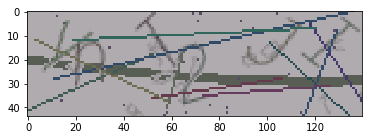

In [94]:
plt.imshow(x)
plt.show()

In [113]:
str(x.tolist())

'[[[176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [87, 76, 104], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [136, 129, 134], [149, 144, 148], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 17

In [128]:
newiamge = sqlContext.createDataFrame([('1', str(x.tolist()))], ['id', 'mat'])

In [129]:
newiamge.write.mode("append").insertInto('images')

In [130]:
sqlContext.sql("SELECT * FROM images").show()

+---+--------------------+
| id|                 mat|
+---+--------------------+
|  1|           [1, 2, 3]|
|  2|           [4, 5, 6]|
|  3|           [7, 8, 9]|
|  1|[[[176, 171, 175]...|
+---+--------------------+



In [ ]:
sqlContext.sql("CREATE EXTERNAL TABLE images (id STRING COMMENT 'id of images', mat STRING COMMENT 'string of list') COMMENT \
'This is used to store images' ROW FORMAT DELIMITED \
FIELDS TERMINATED BY '\t' STORED AS TEXTFILE LOCATION 'hdfs://master:9000/user/hive/images'")

In [214]:
sqlContext.sql("CREATE EXTERNAL TABLE images2 (id STRING COMMENT 'id of images', mat ARRAY<ARRAY<INT>> COMMENT 'array of list') COMMENT \
'This is used to store images' ROW FORMAT DELIMITED \
FIELDS TERMINATED BY '\t' STORED AS TEXTFILE LOCATION 'hdfs://master:9000/user/hive/images'")

DataFrame[]

In [215]:
sqlContext.sql("DESCRIBE TABLE images2").show()

+--------+-----------------+-------------+
|col_name|        data_type|      comment|
+--------+-----------------+-------------+
|      id|           string| id of images|
|     mat|array<array<int>>|array of list|
+--------+-----------------+-------------+



In [213]:
sqlContext.sql("DROP TABLE images2")

DataFrame[]

In [216]:
newimage2 = sqlContext.createDataFrame([(1, [[1]])], ['id', 'mat'])

In [217]:
newimage2.show()

+---+-----------------+
| id|              mat|
+---+-----------------+
|  1|[WrappedArray(1)]|
+---+-----------------+



In [218]:
newimage2.write.mode("append").insertInto('images2')

In [219]:
sqlContext.sql("SELECT * FROM images2").show()

+---+-----------------+
| id|              mat|
+---+-----------------+
|  1|[WrappedArray(1)]|
+---+-----------------+



In [252]:
sqlContext.sql("CREATE EXTERNAL TABLE images3 (id STRING COMMENT 'id of images', mat ARRAY<ARRAY<ARRAY<BIGINT>>> \
COMMENT 'array of list') COMMENT \
'This is used to store images' ROW FORMAT DELIMITED \
FIELDS TERMINATED BY '\t' STORED AS TEXTFILE LOCATION 'hdfs://master:9000/user/hive/images'")

DataFrame[]

In [253]:
sqlContext.sql("DESCRIBE TABLE images3").show()

+--------+--------------------+-------------+
|col_name|           data_type|      comment|
+--------+--------------------+-------------+
|      id|              string| id of images|
|     mat|array<array<array...|array of list|
+--------+--------------------+-------------+



In [254]:
sqlContext.sql("DROP TABLE images3")

DataFrame[]

In [235]:
newimage3 = sqlContext.createDataFrame([(1, x.tolist())], ['id', 'mat'])

In [236]:
newimage3.show()

+---+--------------------+
| id|                 mat|
+---+--------------------+
|  1|[WrappedArray(Wra...|
+---+--------------------+



In [237]:
newimage3.write.mode("append").insertInto('images3')

In [238]:
sqlContext.sql("SELECT * FROM images3").show()

+---+--------------------+
| id|                 mat|
+---+--------------------+
|  1|[WrappedArray(Wra...|
|  1|[WrappedArray(Wra...|
+---+--------------------+



In [239]:
sqlContext.sql("SELECT * FROM images3").take(2)

[Row(id=u'1', mat=[[[1]]]),
 Row(id=u'1', mat=[[[176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [87, 76, 104], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [136, 129, 134], [149, 144, 148], [176, 171, 175], [1

In [242]:
row = sqlContext.sql("SELECT * FROM images3").take(2)[1]

In [250]:
row

Row(id=u'1', mat=[[[176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [87, 76, 104], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [176, 171, 175], [136, 129, 134], [149, 144, 148], [176, 171, 175], [176, 171, 175], [176, 171, 175

In [249]:
type(row['mat'])

list

In [256]:
sqlContext.sql("DROP TABLE images3")

DataFrame[]

In [257]:
sqlContext.sql("CREATE EXTERNAL TABLE images3 (id STRING COMMENT 'id of images', mat ARRAY<ARRAY<ARRAY<BIGINT>>> \
COMMENT 'array of list') COMMENT \
'This is used to store images' ROW FORMAT DELIMITED \
FIELDS TERMINATED BY '\t' STORED AS TEXTFILE LOCATION 'hdfs://master:9000/user/hive/images'")
sqlContext.sql("DESCRIBE TABLE images3").show()
for i, x in enumerate(X):
    newimage = sqlContext.createDataFrame([(i, x.tolist())], ['id', 'mat'])
    newimage.write.mode('append').insertInto('images3')

+--------+--------------------+-------------+
|col_name|           data_type|      comment|
+--------+--------------------+-------------+
|      id|              string| id of images|
|     mat|array<array<array...|array of list|
+--------+--------------------+-------------+



In [260]:
import time

In [ ]:
start_time = time.time()
num = 0
image = gen(width=width, height=height)
while num < 999:
    X, y = image.next()
    for i, x in enumerate(X):
        newimage = sqlContext.createDataFrame([(64*num+i, x.tolist())], ['id', 'mat'])
        newimage.write.mode('append').insertInto('images3')
    num += 1
end_time = time.time()
print 'the total time is', end_time - start_time
print 'the average time is', (end_time - start_time)/1000.0/64